## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [8]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [9]:
gameSales = pd.read_csv(r'D:\School\Leerjaar 2\2.3\Data Science\Notebooks\Datesets\vgsales.csv', sep =',')
gameSales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


The feature variables of this are going to be EU_Sales and Global_Sales

In [10]:
gamesales_train, gamesales_test = train_test_split(gameSales, test_size=0.3, stratify=gameSales['Genre'], random_state=42)
features= ['EU_Sales']
dt_regression = DecisionTreeRegressor(max_depth = 1) # Increase max_depth to see effect in the plot
dt_regression.fit(gamesales_train[features].dropna(), gamesales_train['Global_Sales'].dropna())

DecisionTreeRegressor(max_depth=1)

In [15]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 


In [16]:
predictionsOnTrainset = dt_regression.predict(gamesales_train[features].dropna())
predictionsOnTestset = dt_regression.predict(gamesales_train[features].dropna())

rmseTrain = calculate_rmse(predictionsOnTrainset, gamesales_train.Global_Sales.dropna())
rmseTest = calculate_rmse(predictionsOnTestset, gamesales_train.Global_Sales.dropna())

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 1.2003548694830313
RMSE on test set 1.2003548694830313


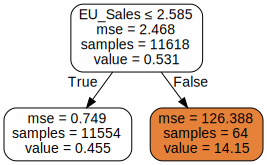

In [18]:
plot_tree_regression(dt_regression, features)

The train set really did not differ much but it has to do with all the entries
